# About Dataset

## Context
This dataset contains information on user preference data from **73,516 users** on **12,294 anime**. Each user is able to add anime to their completed list and give it a rating, and this dataset is a compilation of those ratings.

## Content

### Anime.csv
- **anime_id** - myanimelist.net's unique id identifying an anime
- **name** - full name of anime
- **genre** - comma separated list of genres for this anime
- **type** - movie, TV, OVA, etc.
- **episodes** - how many episodes in this show (1 if movie)
- **rating** - average rating out of 10 for this anime
- **members** - number of community members that are in this anime's "group"

### Rating.csv
- **user_id** - non identifiable randomly generated user id
- **anime_id** - the anime that this user has rated
- **rating** - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating)

## Acknowledgements
Thanks to myanimelist.net API for providing anime data and user ratings.

## Inspiration
Building a better anime recommendation system based only on user viewing history.

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas.core.tools.datetimes import overload

In [3]:
anime = pd.read_csv('anime.csv')
anime_rating = pd.read_csv('rating.csv')

In [4]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [5]:
anime.shape

(12294, 7)

In [6]:
anime_rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [7]:
print('Jumlah judul anime: ', len(anime.anime_id.unique()))
print('Jumlah genre anime: ', len(anime.genre.unique()))
print('Jumlah sample rating anime: ', len(anime_rating.user_id.unique()))

Jumlah judul anime:  12294
Jumlah genre anime:  3265
Jumlah sample rating anime:  73515


In [8]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [9]:
anime_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [10]:
anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [11]:
anime = anime.dropna()

In [12]:
anime.shape

(12017, 7)

In [13]:
anime_rating.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [14]:
dup_anime = anime[anime.duplicated()].shape[0]
print(f"Terdapat {dup_anime} duplikat dari {anime.shape[0]} sample pada anime dataset.")

Terdapat 0 duplikat dari 12017 sample pada anime dataset.


In [15]:
dup_rating = anime_rating[anime_rating.duplicated()].shape[0]
print(f"Terdapat {dup_rating} duplikat dari {anime_rating.shape[0]} sample pada rating anime dataset.")

Terdapat 1 duplikat dari 7813737 sample pada rating anime dataset.


In [16]:
anime_rating.drop_duplicates(keep='first',inplace=True)
print(f"Sample rating anime dataset sekarang adalah {anime_rating.shape[0]}.")

Sample rating anime dataset sekarang adalah 7813736.


In [17]:
import html

def text_cleaning(text):
    if not isinstance(text, str):
        return text
    
    # Decode HTML entities
    text = html.unescape(text)
    
    # Hapus semua tanda kutip dan apostrof
    text = re.sub(r'["\']', '', text)
    text = re.sub(r'\.hack//', '', text)
    text = re.sub(r'&', 'and', text)
    
    return text

anime['name'] = anime['name'].apply(text_cleaning)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21732\2587400173.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime['name'] = anime['name'].apply(text_cleaning)


In [18]:
anime.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,anime_id,rating,members
count,12017.00,12017.00,12017.00
mean,13638.00,6.48,18348.88
std,11231.08,1.02,55372.50
min,1.00,1.67,12.00
25%,3391.00,5.89,225.00
50%,9959.00,6.57,1552.00
75%,23729.00,7.18,9588.00
max,34519.00,10.00,1013917.00


In [19]:
anime_rating.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,user_id,anime_id,rating
count,7813736.00,7813736.00,7813736.00
mean,36727.96,8909.07,6.14
std,20997.95,8883.95,3.73
min,1.00,1.00,-1.00
25%,18974.00,1240.00,6.00
50%,36791.00,6213.00,7.00
75%,54757.00,14093.00,9.00
max,73516.00,34519.00,10.00


In [20]:
anime_rating = anime_rating[~(anime_rating.rating == -1)]

In [21]:
anime_rating.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,user_id,anime_id,rating
count,6337240.00,6337240.00,6337240.00
mean,36747.91,8902.87,7.81
std,21013.40,8882.00,1.57
min,1.00,1.00,1.00
25%,18984.00,1239.00,7.00
50%,36815.00,6213.00,8.00
75%,54873.00,14075.00,9.00
max,73516.00,34475.00,10.00


In [22]:
anime.groupby('genre')['genre'].agg('count')

genre
Action                                                     53
Action, Adventure                                          15
Action, Adventure, Cars, Comedy, Sci-Fi, Shounen            2
Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports     1
Action, Adventure, Cars, Sci-Fi                             1
                                                           ..
Super Power, Supernatural, Vampire                          1
Supernatural                                               14
Thriller                                                    1
Vampire                                                     1
Yaoi                                                        2
Name: genre, Length: 3229, dtype: int64

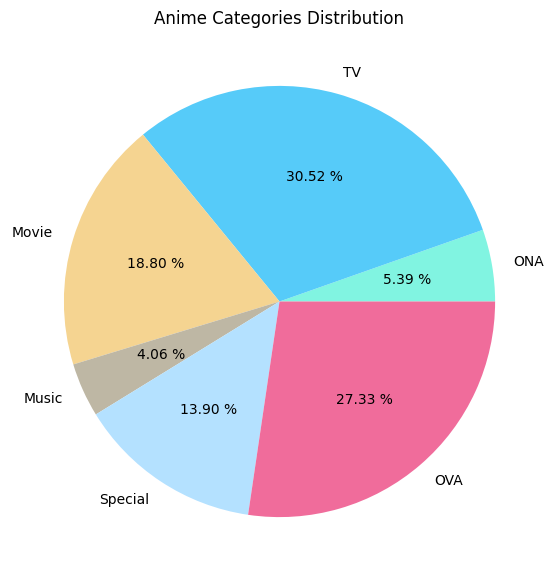

In [23]:
ona = len(anime.loc[anime['type'] == 'ONA'])
tv = len(anime.loc[anime['type'] == 'TV'])
movie = len(anime.loc[anime['type'] == 'Movie'])
music = len(anime.loc[anime['type'] == 'Music'])
special = len(anime.loc[anime['type'] == 'Special'])
ova = len(anime.loc[anime['type'] == 'OVA'])

labels = ['ONA', 'TV', 'Movie', 'Music', 'Special', 'OVA']
colors = ['#81F4E1', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B']

plt.figure(figsize = (10,7))
plt.title('Anime Categories Distribution')
plt.pie([ona, tv, movie, music, special, ova],
  labels = labels,
  colors = colors,
  autopct = '%.2f %%'
  )
  
plt.show()

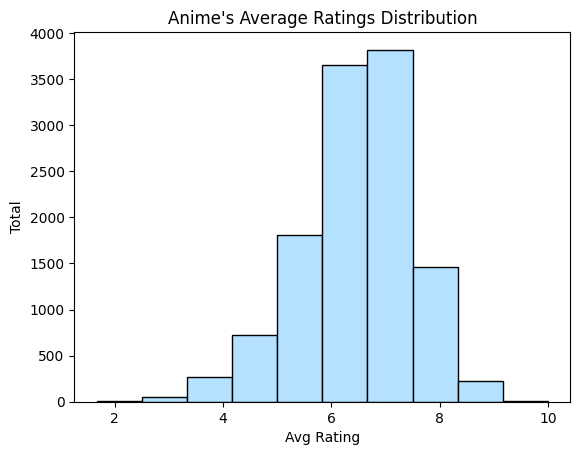

In [24]:
# Anime's Average Ratings Distribution
plt.hist(anime.rating, color='#B4E1FF', edgecolor='black')
plt.ylabel('Total')
plt.xlabel('Avg Rating')
plt.title("Anime's Average Ratings Distribution")
plt.show()
     

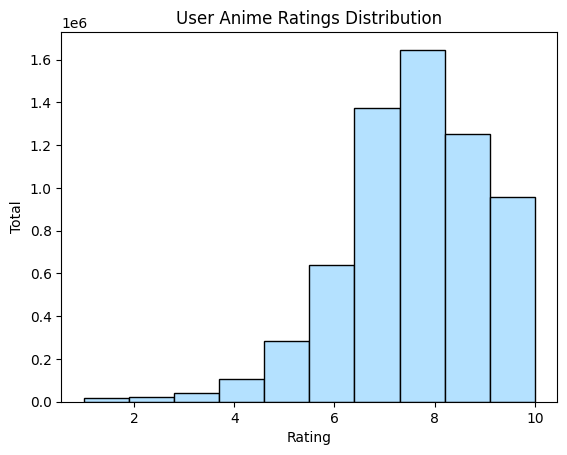

In [25]:
# User Anime Ratings Distribution
plt.hist(anime_rating.rating, color='#B4E1FF', edgecolor='black')
plt.ylabel('Total')
plt.xlabel('Rating')
plt.title("User Anime Ratings Distribution")
plt.show()
     

In [26]:
anime.sort_values(by='members', ascending=False).head(10)

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


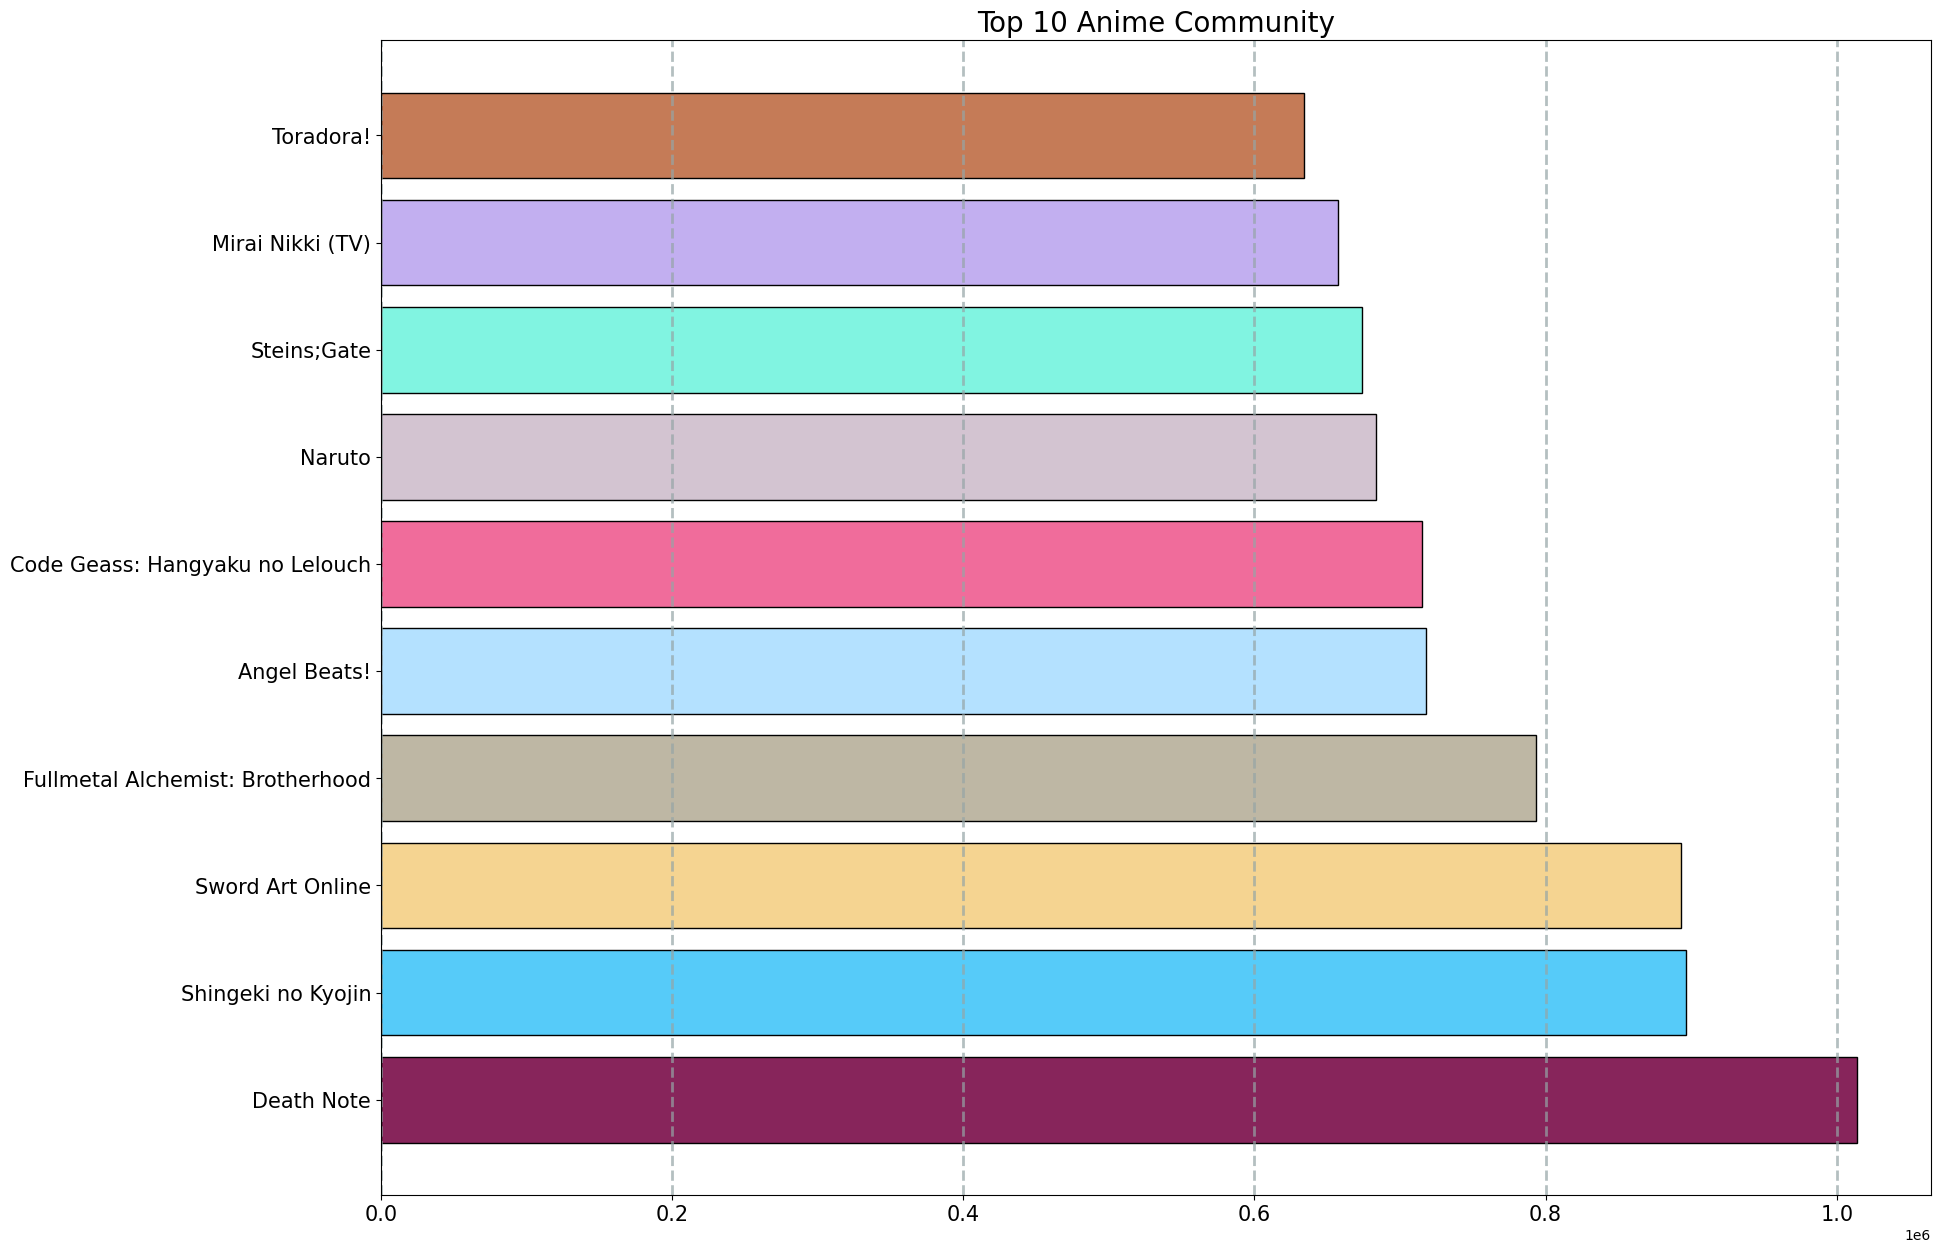

In [27]:
plt.figure(figsize = (20,15))
top10_anime = anime[['name', 'members']].sort_values(by = 'members',ascending = False).head(10)

colors = ['#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']


labels = top10_anime[['name']].values.flatten()
values = top10_anime[['members']].values.flatten()

plt.barh(labels, values, color = colors, edgecolor='black')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Top 10 Anime Community", fontdict = {'fontsize' : 20})
plt.show()

plt.show()

In [28]:
anime.sort_values(by='rating', ascending=False).head(10)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
10786,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25,53
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


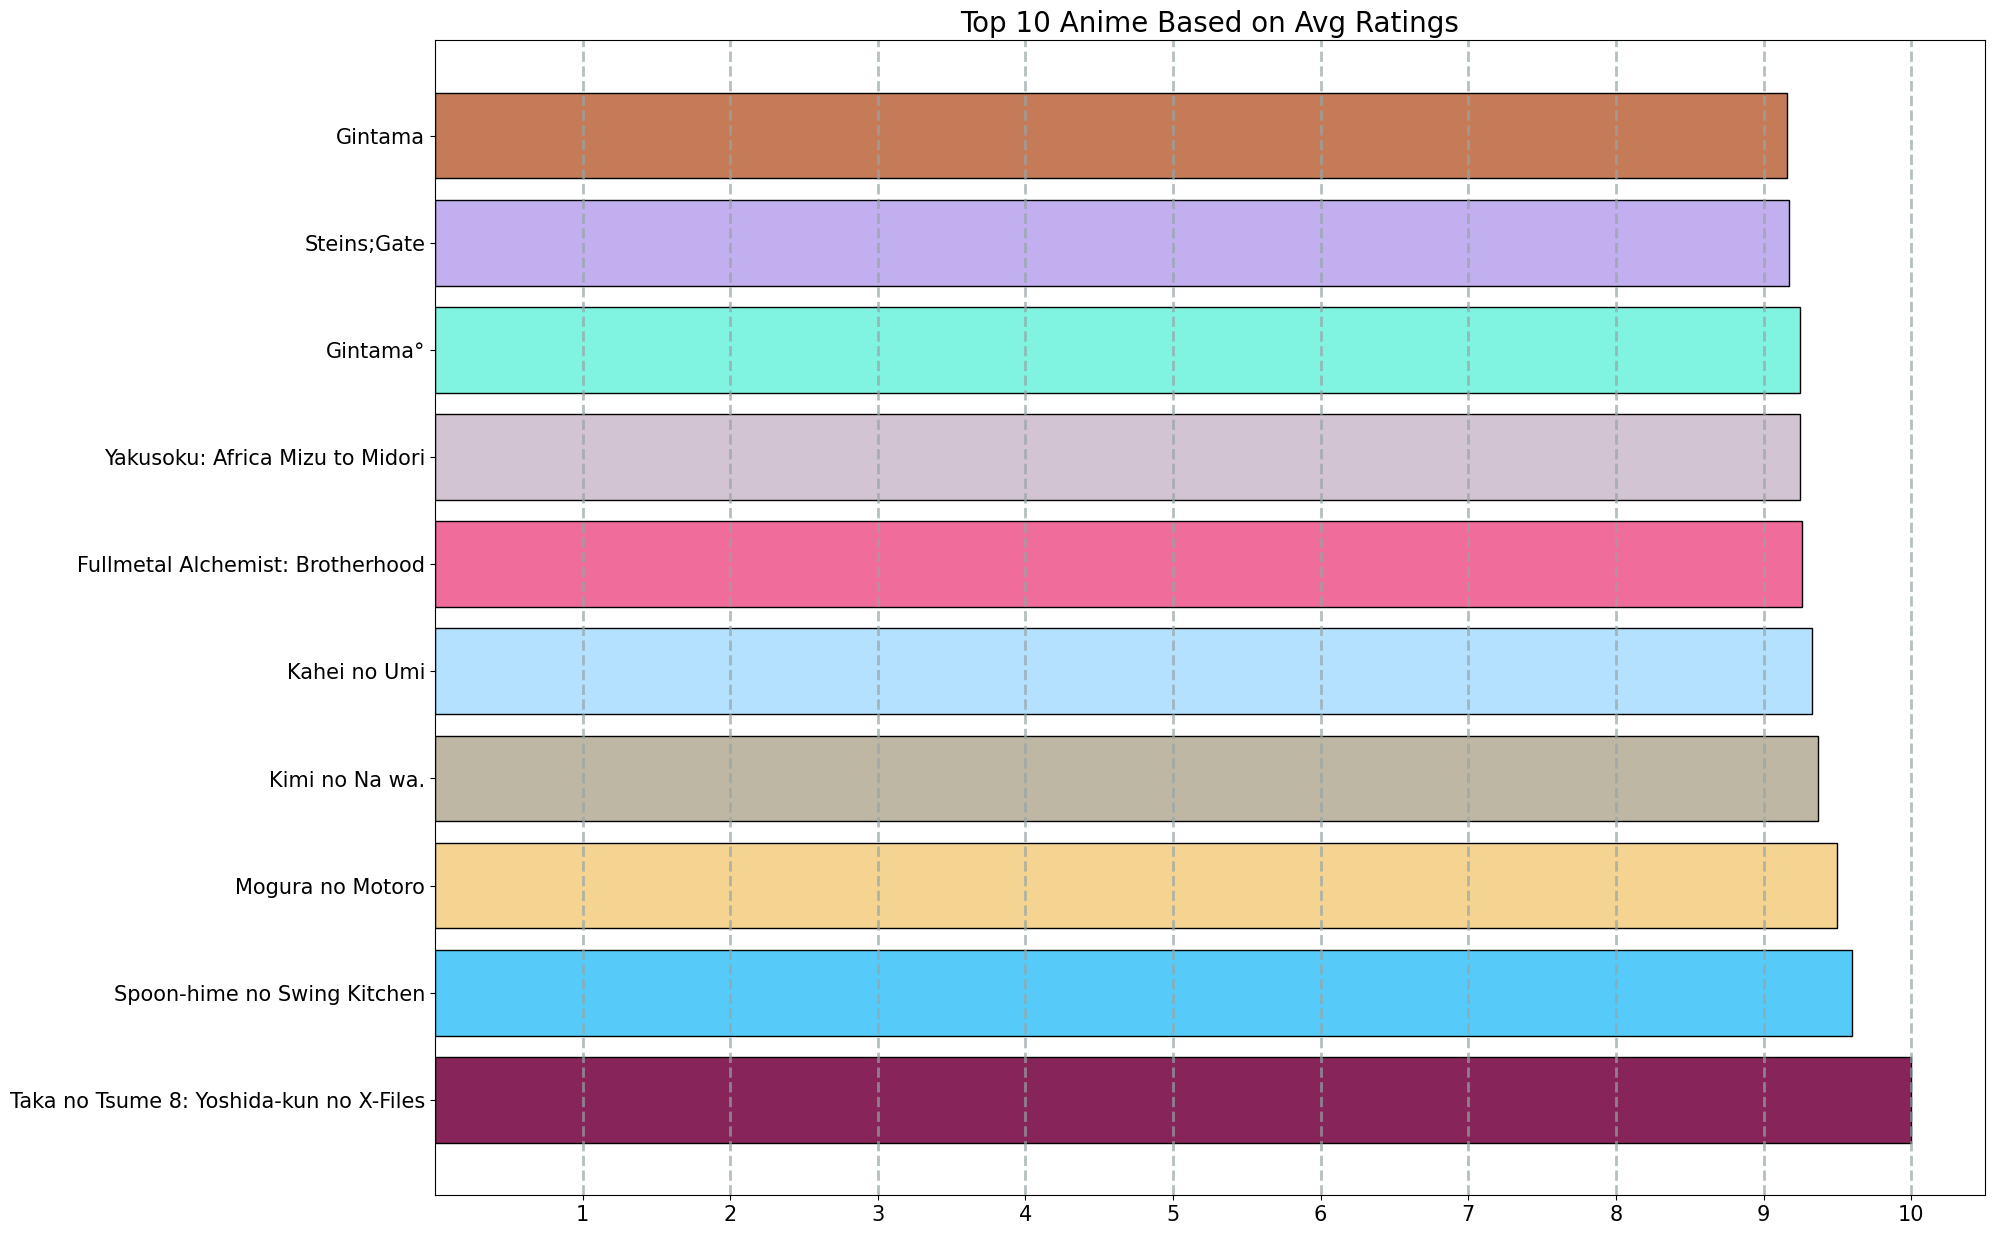

In [29]:
# Top 10 Anime Based on Avg Ratings Plot
plt.figure(figsize = (20,15))
top10_anime = anime[['name', 'rating']].sort_values(by = 'rating',ascending = False).head(10)

colors = ['#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']

bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


labels = top10_anime[['name']].values.flatten()
values = top10_anime[['rating']].values.flatten()

plt.barh(labels, values, color = colors, edgecolor='black')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.xticks(bins, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Top 10 Anime Based on Avg Ratings", fontdict = {'fontsize' : 20})
plt.show()

plt.show()

In [30]:
anime_rating.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [32]:
anime_rating_contribution = anime_rating.groupby('anime_id').count()
anime_rating_contribution.head(3)

,user_id,rating
anime_id,,
1,13449,13449
5,5790,5790
6,9385,9385


In [33]:
anime2 = anime.drop(['rating'], axis = 'columns')
name_anime_rating_contribution = pd.merge(anime_rating_contribution, anime2, on = 'anime_id', how = 'left')
name_anime_rating_contribution.sort_values(by='rating', ascending=False).head(10)

,anime_id,user_id,rating,name,genre,type,episodes,members
1388,1535,34226,34226,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,1013917.0
6323,11757,26310,26310,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,893100.0
7059,16498,25289,25289,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,896229.0
1426,1575,24126,24126,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,715151.0
4567,6547,23565,23565,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,717796.0
201,226,23528,23528,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,623511.0
10,20,22071,22071,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297.0
3936,5114,21494,21494,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,793665.0
99,121,21332,21332,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,600384.0
2642,2904,21124,21124,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,572888.0


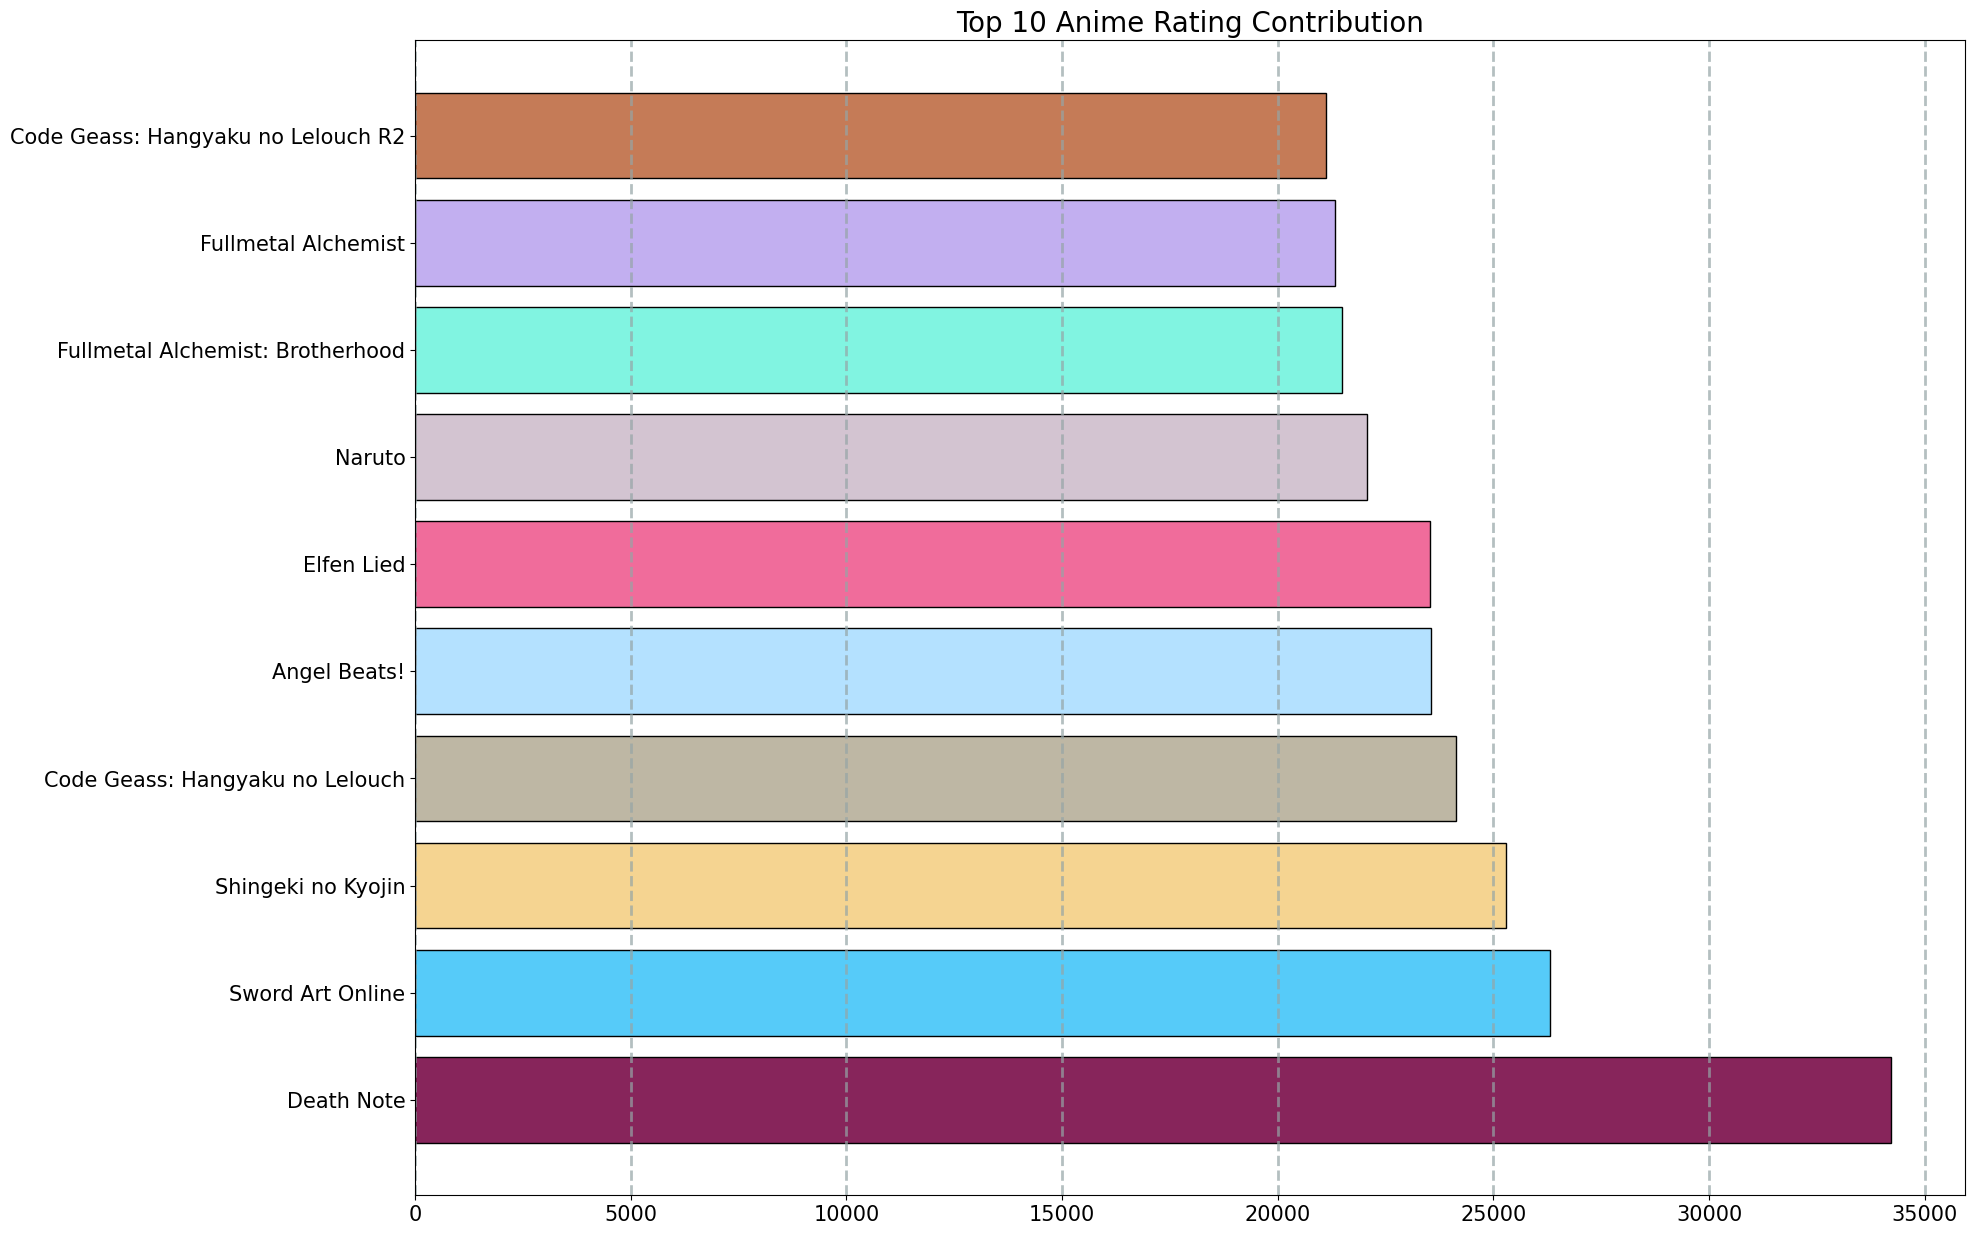

In [34]:
plt.figure(figsize = (20,15))
top10_anime = name_anime_rating_contribution[['name', 'rating']].sort_values(by = 'rating',ascending = False).head(10)

colors = ['#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']


labels = top10_anime[['name']].values.flatten()
values = top10_anime[['rating']].values.flatten()

plt.barh(labels, values, color = colors, edgecolor='black')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Top 10 Anime Rating Contribution", fontdict = {'fontsize' : 20})
plt.show()

plt.show()

In [37]:
tf = TfidfVectorizer()
tf.fit(anime['genre']) 
tf.get_feature_names_out()

array(['action', 'adventure', 'ai', 'arts', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'ecchi', 'fantasy', 'fi', 'game', 'harem',
       'hentai', 'historical', 'horror', 'josei', 'kids', 'life', 'magic',
       'martial', 'mecha', 'military', 'music', 'mystery', 'of', 'parody',
       'police', 'power', 'psychological', 'romance', 'samurai', 'school',
       'sci', 'seinen', 'shoujo', 'shounen', 'slice', 'space', 'sports',
       'super', 'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri'],
      dtype=object)

In [38]:
tfidf_matrix = tf.fit_transform(anime['genre'])
tfidf_matrix.shape 

(12017, 47)

In [39]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29498527, 0.3162867 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.2516182 , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]], shape=(12017, 47))

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names_out(),
    index=anime.name
).sample(22, axis=1).sample(10, axis=0)

,life,samurai,adventure,action,harem,drama,shounen,vampire,space,school,...,seinen,shoujo,yuri,josei,ecchi,hentai,thriller,magic,parody,supernatural
name,,,,,,,,,,,,,,,,,,,,,
Digimon Savers: Agumon! Gaomon! Lalamon! Bakuretsu! Jougai Last Battle!,0.0,0.0,0.368113,0.343322,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.484729
Detective Conan Movie 05: Countdown to Heaven,0.0,0.0,0.332523,0.000000,0.0,0.000000,0.368079,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
Sore Ike! Anpanman: Niji no Pyramid,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
Go! Go! Vejitan,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.669315,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
Nerima Daikon Brothers,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
Kuro,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
V.G.Neo The Animation,0.0,0.0,0.000000,0.309113,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.420931,0.0,0.0,0.0,0.000000
Aquarion Logos,0.0,0.0,0.000000,0.311389,0.0,0.353834,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
D-Spray,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000


In [42]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.14715318, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14715318, 1.        , 0.17877808, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17877808, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]], shape=(12017, 12017))

In [49]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime['name'], columns=anime['name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (12017, 12017)


name,The Primitives: Bongo and Grunge,Shingeki no Bahamut: Genesis Recap,Rose of Versailles Movie,"Mobile Suit SD Gundam Musha, Knight, Commando",Dragon Fist
name,,,,,
Bubuki Buranki,0.000000,0.113064,0.177302,0.412974,0.114042
"Machine Robo: Leina, The Legend of Wolf Blade",0.000000,0.072656,0.000000,0.265382,0.631073
Tongari Boushi no Memole: Marielle no Housekibako,0.000000,0.424885,0.371378,0.168649,0.308431
Sengoku Otome: Momoiro Paradox,0.191849,0.071536,0.196426,0.138665,0.072155
Kuma Miko,0.268803,0.000000,0.000000,0.075409,0.000000
Yakyuubu Aruaru,0.000000,0.000000,0.000000,0.000000,0.000000
Komaneko no Christmas: Maigo ni Natta Present,0.591614,0.259871,0.000000,0.474186,0.000000
Kitty-chan wo Sagase! Toyama-shi Stamp Rally,1.000000,0.000000,0.000000,0.280535,0.000000
"Umi Da! Funade Da! Nikoniko, Pun",0.591614,0.259871,0.000000,0.474186,0.000000


In [71]:

def anime_recommendations(name, similarity_data=cosine_sim_df, items=anime[['name', 'genre']], k=10):
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,name].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop name agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(name, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [72]:
anime[anime.name.eq('Dragon Ball Z')]


,anime_id,name,genre,type,episodes,rating,members
206,813,Dragon Ball Z,"Action, Adventure, Comedy, Fantasy, Martial Ar...",TV,291,8.32,375662


In [73]:
anime_recommendations('Dragon Ball Z')

,name,genre
0,Dragon Ball Z: Atsumare! Gokuu World,"Action, Adventure, Comedy, Fantasy, Martial Ar..."
1,Dragon Ball Super,"Action, Adventure, Comedy, Fantasy, Martial Ar..."
2,Dragon Ball GT: Goku Gaiden! Yuuki no Akashi w...,"Action, Adventure, Comedy, Fantasy, Martial Ar..."
3,Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...,"Action, Adventure, Comedy, Fantasy, Martial Ar..."
4,Dragon Ball Z: Summer Vacation Special,"Action, Adventure, Comedy, Fantasy, Martial Ar..."
5,Dragon Ball Kai,"Action, Adventure, Comedy, Fantasy, Martial Ar..."
6,Dragon Ball Z Movie 15: Fukkatsu no F,"Action, Adventure, Comedy, Fantasy, Martial Ar..."
7,Dragon Ball Kai (2014),"Action, Adventure, Comedy, Fantasy, Martial Ar..."
8,Dragon Ball Z Movie 14: Kami to Kami,"Action, Adventure, Fantasy, Martial Arts, Shou..."
9,Dragon Ball,"Adventure, Comedy, Fantasy, Martial Arts, Shou..."


In [74]:
anime[anime.name.eq('Shingeki no Kyojin')]

,anime_id,name,genre,type,episodes,rating,members
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229


In [75]:
anime_recommendations('Shingeki no Kyojin')

,name,genre
0,Shingeki no Kyojin Movie 1: Guren no Yumiya,"Action, Drama, Fantasy, Shounen, Super Power"
1,Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa,"Action, Drama, Fantasy, Shounen, Super Power"
2,Shingeki no Kyojin: Ano Hi Kara,"Action, Drama, Fantasy, Shounen, Super Power"
3,Shingeki no Kyojin OVA,"Action, Drama, Fantasy, Shounen, Super Power"
4,Saint Seiya: Meiou Hades Elysion-hen,"Action, Fantasy, Shounen, Super Power"
5,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho..."
6,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,"Action, Adventure, Comedy, Drama, Fantasy, Sho..."
7,One Piece: Episode of Nami - Koukaishi no Nami...,"Action, Adventure, Comedy, Drama, Fantasy, Sho..."
8,One Piece: Romance Dawn,"Action, Comedy, Fantasy, Shounen, Super Power"
9,One Piece: Episode of Merry - Mou Hitori no Na...,"Action, Adventure, Comedy, Drama, Fantasy, Sho..."


In [76]:
anime[anime.name.eq('Pokemon')]

,anime_id,name,genre,type,episodes,rating,members
1834,527,Pokemon,"Action, Adventure, Comedy, Fantasy, Kids",TV,276,7.43,229157


In [77]:
anime_recommendations('Pokemon')

,name,genre
0,Pokemon Diamond and Pearl,"Action, Adventure, Comedy, Fantasy, Kids"
1,Digimon Universe: Appli Monsters,"Action, Adventure, Comedy, Fantasy, Kids"
2,Pokemon Best Wishes! Season 2: Decolora Advent...,"Action, Adventure, Comedy, Fantasy, Kids"
3,Pokemon Best Wishes! Season 2: Decolora Advent...,"Action, Adventure, Comedy, Fantasy, Kids"
4,Pokemon Crystal: Raikou Ikazuchi no Densetsu,"Action, Adventure, Comedy, Fantasy, Kids"
5,Pokemon: The Origin,"Action, Adventure, Comedy, Fantasy, Kids"
6,Pokemon XYandZ Specials,"Action, Adventure, Comedy, Fantasy, Kids"
7,Pokemon XY: Mega Evolution,"Action, Adventure, Comedy, Fantasy, Kids"
8,Pokemon Best Wishes! Season 2: Episode N,"Action, Adventure, Comedy, Fantasy, Kids"
9,Pokemon XY: New Year Special,"Action, Adventure, Comedy, Fantasy, Kids"
